In [1]:
import pandas as pd

# For the price data
data_day_minus_1 = pd.read_csv('prices_round_2_day_-1.csv', delimiter=';')
data_day_0 = pd.read_csv('prices_round_2_day_0.csv', delimiter=';')
data_day_1 = pd.read_csv('prices_round_2_day_1.csv', delimiter=';')

# For the trading data
trading_data_day_1 = pd.read_csv('day_1_trading_data.csv', delimiter=';')

# Quick look at the data
print(data_day_minus_1.head())
print(data_day_0.head())
print(data_day_1.head())
print(trading_data_day_1.head())

# Check basic statistics for day -1 prices
print(data_day_minus_1.describe())


   timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0          0  1200.00             1.5           10.5           -2.0   
1        100  1201.75             1.5            9.5           -2.0   
2        200  1201.75             1.5            9.5           -2.0   
3        300  1201.75             1.5            9.5           -2.0   
4        400  1201.75             1.5            9.5           -2.0   

    SUNLIGHT  HUMIDITY  DAY  
0  2500.0000  79.00000   -1  
1  2499.4197  79.00410   -1  
2  2498.8457  79.00821   -1  
3  2498.2780  79.01234   -1  
4  2497.7166  79.01649   -1  
   timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0          0  1111.75             1.5           10.5           -2.0   
1        100  1111.75             1.5           10.5           -2.0   
2        200  1109.75             1.5           10.5           -2.0   
3        300  1109.25             1.5           10.5           -2.0   
4        400  1110.75             1.5 

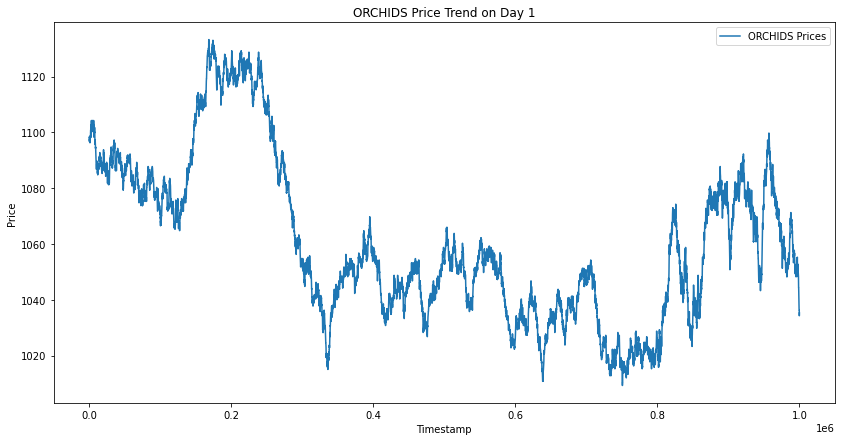

In [2]:
import matplotlib.pyplot as plt

# Plotting ORCHIDS prices over time for Day 1
plt.figure(figsize=(14, 7))
plt.plot(data_day_1['timestamp'], data_day_1['ORCHIDS'], label='ORCHIDS Prices')
plt.title('ORCHIDS Price Trend on Day 1')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


In [3]:
# Calculate and display correlation matrix for price and external factors
correlation_matrix = data_day_1[['ORCHIDS', 'SUNLIGHT', 'HUMIDITY']].corr()
print(correlation_matrix)


           ORCHIDS  SUNLIGHT  HUMIDITY
ORCHIDS   1.000000 -0.410192  0.622763
SUNLIGHT -0.410192  1.000000 -0.262965
HUMIDITY  0.622763 -0.262965  1.000000


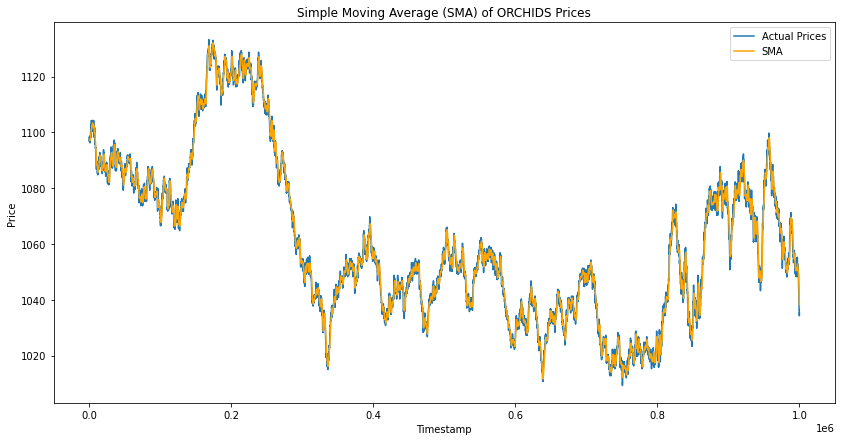

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Again, replace 'data' with the actual name of your DataFrame

# Choose a window size for your SMA
window_size = 10  # You can adjust this based on the granularity of your data

# Calculate the SMA
sma = data_day_1['ORCHIDS'].rolling(window=window_size).mean()

# Plotting the SMA with the original prices
plt.figure(figsize=(14, 7))
plt.plot(data_day_1['timestamp'], data_day_1['ORCHIDS'], label='Actual Prices')
plt.plot(data_day_1['timestamp'], sma, label='SMA', color='orange')

# Label the plot
plt.title('Simple Moving Average (SMA) of ORCHIDS Prices')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()
